# Natural Language processing and Sentiment analysis

**Author:** 'Felipe Millacura'
    
**Date:** '07th March 2021'

## Learning Objectives

* Be able to extract web content (*Web Scraping*) 
* Understand what a JSON object is and why data is stored in this format
* Understand what a Sentiment Analysis is
* Know about the different analysis available on `nltk`
* Be able to find the sentiment of words and do analysis using those sentiments.
* Generation of WordClouds


## Introduction


We are currently living on the **Web 3.0** revolution were content is not only generated and posted on static websites (**Web 1.0**) or has some simple user interactivity (**Web 2.0**). Instead, now users become content creators and have control on what is being published or deleted, thus generating massive quantities of data. Additionally, the data produced is expanded by the integration of modern technologies such as: Internet of Things, Artificial Intelligence, BigData, Virtual and Augmented Reality.

![web3](images/web3.png)



How usable is this data and how this can be quantified and analysed are is one of the main goal of this lesson!

## Web Scrapping

While *web scraping* can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. 

Scraping a webpage involves both a `fetching` and `extracting` step. **Fetching** is the downloading of a website (which a browser does when a user views a page). Once fetched, then the **extraction** can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on.

The scraping software simulates to be a human being by extracting data is visible on the webpage. The automation of this process allows us to extract large volumes of data quickly and accurately. 

## Python libraries

Existen varias librerias en Python para realizar scrapping. A continuacion una tabla comparativa de los frameworks mas populares en python (*Fuente: [Python Web Scrapping - Kite, 2020](https://www.youtube.com/watch?v=zucvHSQsKHA)*)

 <img src="./images/scraping.png" alt="Drawing" style="width: 600px;"/> 

In this tutorial we will use **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)**

We will start by downloading two needed libraries: `requests` that will allow us load URLs and `bs4` that includes `BeautifulSoup`

In [ ]:
!pip install requests 
!pip install bs4

In [1]:
import requests 
from bs4 import BeautifulSoup

The first thing we must do is to **load the html code** from the URL of the page of interest. Here we will retrieve the **latest publications** from [arXiv](https://arxiv.org/) 

Note that the query for the search engine is explicited in the URL allowing us to modify it directly

```https: //arxiv.org/search/? query = machine + learning & searchtype = all & abstracts = show & order = -announced_date_first & size = 200```

In this case, we can create a ``list`` to receive the keywords to search for

In [2]:
key_words = ['machine', 'learning']

str_keywords = '+'.join(key_words)

base = 'https://arxiv.org/search/?query={}&searchtype=all&abstracts=show&order=-announced_date_first&size=200'
url  = base.format(str_keywords)
print(url)

https://arxiv.org/search/?query=machine+learning&searchtype=all&abstracts=show&order=-announced_date_first&size=200


Once we have our link, we can request the `HTML` code of the page by using [`requests.get()`](https://requests.readthedocs.io/en/master/user/quickstart/)

In [3]:
%%time
html_page = requests.get(url) 

Wall time: 3.42 s


In [5]:
html_page.text

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8"/>\n<meta name="viewport" content="width=device-width, initial-scale=1"/>\n<!-- new favicon config and versions by realfavicongenerator.net -->\n<link rel="apple-touch-icon" sizes="180x180" href="https://static.arxiv.org/static/base/0.16.8/images/icons/apple-touch-icon.png">\n<link rel="icon" type="image/png" sizes="32x32" href="https://static.arxiv.org/static/base/0.16.8/images/icons/favicon-32x32.png">\n<link rel="icon" type="image/png" sizes="16x16" href="https://static.arxiv.org/static/base/0.16.8/images/icons/favicon-16x16.png">\n<link rel="manifest" href="https://static.arxiv.org/static/base/0.16.8/images/icons/site.webmanifest">\n<link rel="mask-icon" href="https://static.arxiv.org/static/base/0.16.8/images/icons/safari-pinned-tab.svg" color="#b31b1b">\n<link rel="shortcut icon" href="https://static.arxiv.org/static/base/0.16.8/images/icons/favicon.ico">\n<meta name="msapplication-TileColor" content="#b31b1b"

Once the HTML plain text is loaded, we must start a `Parser` from `BeautifulSoup`. A parser is a **sinctactic analyser**. 

In this case BeautifulSoup allow us to work with different syntaxes, such as `HTML` or `XML` 

In [7]:
soup = BeautifulSoup(html_page.text, 'html.parser')

Now we are able to extract the information we need. The most direct way to do it is from a web browser:

1. Open the web page to analyse
2. Right click on the item of interest <img src = "./images/arxiv_1.png" alt = "Drawing" style = "width: 600px;" />
3. Click on inspect <img src = "./images/arxiv_2.png" alt = "Drawing" style = "width: 200px;" />
4. Check the HTML tags to access the content directly in our scrapper <img src = "./images/arxiv_3.png" alt = "Drawing" style = "width: 600px;" /> 

In this example we will extract the manuscript titles, therefore we must extract the paragraphs  tagged as ``<p>`` whose class name is ``class ="title is-5 mathjax">`` 

In [8]:
titles = soup.find_all('p', attrs = {"class": 'title is-5 mathjax'})

The function ``find_all()`` returns a list of type ``bs4.element.Tag`` with the matches of our query. 

In [10]:
for title in titles:
    print(title.text.strip())
    break

Genetic Algorithm based hyper-parameters optimization for transfer Convolutional Neural Network


and there you you have!

### Exercise: Obtaining the paper links

In this case we are going to read the HTML container in a little more general way. According to our previous query, all the results are encapsulated in the tag ``<li>`` whose class is ``class ="arxiv-result"`` 

In [11]:
results = soup.find_all('li', attrs = {'class': ['arxiv-result'})

In [12]:
results

[<li class="arxiv-result">
 <div class="is-marginless">
 <p class="list-title is-inline-block"><a href="https://arxiv.org/abs/2103.03875">arXiv:2103.03875</a>
 <span> [<a href="https://arxiv.org/pdf/2103.03875">pdf</a>] </span>
 </p>
 <div class="tags is-inline-block">
 <span class="tag is-small is-link tooltip is-tooltip-top" data-tooltip="Neural and Evolutionary Computing">cs.NE</span>
 <span class="tag is-small search-hit tooltip is-tooltip-top" data-tooltip="Machine Learning">cs.LG</span>
 </div>
 </div>
 <p class="title is-5 mathjax">
       
         Genetic Algorithm based hyper-parameters optimization for transfer Convolutional Neural Network
       
     </p>
 <p class="authors">
 <span class="has-text-black-bis has-text-weight-semibold">Authors:</span>
 <a href="/search/?searchtype=author&amp;query=Li%2C+C">Chen Li</a>, 
       
       <a href="/search/?searchtype=author&amp;query=Jiang%2C+J">JinZhe Jiang</a>, 
       
       <a href="/search/?searchtype=author&amp;query=Zhao

We create two empty lists to save the information

In [13]:
titles_list  = [] # to save titles
pdf_link_list = [] # to save links


Now we iterate within `results`  going tag by tag until reaching our needed content

In [1]:
for res in (if resu in results is not None):
    title = res.find('p', attrs = {"class": "title is-5 mathjax"}) # access the title tag
    link_content = res.find('p', attrs = {"class": "list-title is-inline-block"}) # access the link tag
    link_content = link_content.find('span') # then to the span tag within the previous tag
    link_content = link_content.find_all('a') # finally we extract extraemos all links within <a>
    links = [link.attrs.get('href') for link in link_content] # we iterate and extract the href attribute 
    
    # Saves the paper title
    titles_list.append(title.text.strip())
    
    # The first link will always be pdf 
    pdf_link_list.append(links[0])

SyntaxError: invalid syntax (<ipython-input-1-c11c96757b2a>, line 1)

Now that we have everything properly saved we can create a Pandas `DataFrame` with the obtained the results 

In [15]:
import pandas as pd

In [16]:
df_arxiv = pd.DataFrame() # We create an empty DataFrame
df_arxiv['title'] = titles_list # Creates the title column
df_arxiv['link'] = pdf_link_list  # Creates the link column

In [17]:
df_arxiv.head()

,title,link
0,Genetic Algorithm based hyper-parameters optim...,https://arxiv.org/pdf/2103.03875
1,Measuring Mathematical Problem Solving With th...,https://arxiv.org/pdf/2103.03874
2,Rissanen Data Analysis: Examining Dataset Char...,https://arxiv.org/pdf/2103.03872
3,Lyapunov-Regularized Reinforcement Learning fo...,https://arxiv.org/pdf/2103.03869
4,Decomposable Submodular Function Minimization ...,https://arxiv.org/pdf/2103.03868


We have now the titles and links within our `DataFrame`. But what if we want to make the links clickable? Let's create a function for it!

In [18]:
def make_clickable(val):

    return '<a target="_blank" href="{}">{}</a>'.format(val, val)     #target= "_blank" to open in a new window


Now we can use [`style`](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to change the format

In [19]:
df_arxiv.style.format({'link': make_clickable})

,title,link
0,Genetic Algorithm based hyper-parameters optimization for transfer Convolutional Neural Network,https://arxiv.org/pdf/2103.03875
1,Measuring Mathematical Problem Solving With the MATH Dataset,https://arxiv.org/pdf/2103.03874
2,Rissanen Data Analysis: Examining Dataset Characteristics via Description Length,https://arxiv.org/pdf/2103.03872
3,Lyapunov-Regularized Reinforcement Learning for Power System Transient Stability,https://arxiv.org/pdf/2103.03869
4,Decomposable Submodular Function Minimization via Maximum Flow,https://arxiv.org/pdf/2103.03868
5,Learning to Extend Molecular Scaffolds with Structural Motifs,https://arxiv.org/pdf/2103.03864
6,Harnessing Geometric Constraints from Auxiliary Labels to Improve Embedding Functions for One-Shot Learning,https://arxiv.org/pdf/2103.03862
7,A Learning-Based Approach to Address Complexity-Reliability Tradeoff in OS Decoders,https://arxiv.org/pdf/2103.03860
8,Three-dimensional realizations of flood flow in large-scale rivers using the neural fuzzy-based machine-learning algorithm,https://arxiv.org/pdf/2103.03858
9,A Pilot Study on Visually-Stimulated Cognitive Tasks for EEG-Based Dementia Recognition Using Frequency and Time Features,https://arxiv.org/pdf/2103.03854


and voila! you are ready to start analysing the data!

# Working with JSON data

JSON stands for *JavaScript Object Notation*. JSON is a special form of text data with added structure; in that sense it is similar to CSV, but the similarities don’t go much further

JSON is designed to be readable to computers and by humans. Below you can see an example of a JSON file.

![json_file](images/json.png)

JSON files are designed to work with a range of different programming languages and in different environments. This makes them very useful for moving data, both between applications on the same computer system and between separate computer systems. JSON files are in particularly common on the internet: often the data sent to your computer will arrive in JSON format, and the data sent from your computer to a web server will often be sent as JSON.

All JSON files are made up of two “types” of data structure:

1. Objects, which are collections of key/value pairs. They are surrounded by curly brackets and the keys and values are separated by colons. Here’s a very basic object.

```json
{
  "name": "Luke Skywalker", 
  "height": "172", 
  "mass": "77"
}
```
2. Arrays, which are an ordered list of items. Here’s an example of an array:

```json
[
  "The Empire Strikes Back",
  "Revenge of the Sith",
  "Return of the Jedi",
  "A New Hope",
  "The Force Awakens"
]

```
3. Arrays and objects can be combined together to make complicated structures:

```json
{
  "name": "Luke Skywalker",
  "height": "172",
  "mass": "77",
  "hair_color": "blond",
  "skin_color": "fair",
  "eye_color": "blue",
  "birth_year": "19BBY",
  "gender": "male",
  "homeworld": "Tatooine",
  "films": [
    "The Empire Strikes Back",
    "Revenge of the Sith",
    "Return of the Jedi",
    "A New Hope",
    "The Force Awakens"
  ],
  "species": [
    "Human"
  ],
  "vehicles": [
    "Snowspeeder",
    "Imperial Speeder Bike"
  ]
}
```

## How to read JSON files into Python


It’s pretty easy to load a JSON object in Python. Python has a built-in package called `json`, which can be used to work with JSON data. It’s done by using the `json` module, which provides us with a lot of methods which among `loads()` and `load()` methods are gonna help us to read the JSON file.

In [20]:
import json


### Deserialization of JSON

The Deserialization of JSON means the conversion of JSON objects into their respective Python objects. The load()/loads() method is used for it. If you have used JSON data from another program or obtained as a string format of JSON, then it can easily be deserialized with `load()` or `loads()`, which is usually used to load from `string`, otherwise the root object is in a `list` or  a `dict`. See the following table given below.

JSON | Python
--- | --- 
object | dict
array | list
string | str
null | None
number(int) | int
number (real) |	float
true |	True
false |	False

`json.load()` accepts a file object, parses the JSON data, populates a Python dictionary with the data and returns it back to you. If we want to read the content of the previous StarWars file we would need to do this:

In [21]:
# Python program to read 
# json file 
  
# Opening JSON file 
f = open('data/data.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  
# Iterating through the json 
# list 
for i in data['vehicles']: 
    print(i) 
  
# Closing file 
f.close() 


Snowspeeder
Imperial Speeder Bike


`json.loads()`: If you have a JSON string, you can parse it by using the `json.loads()` method. Here we don't need a pathfile, but passing the file contents as a string, using `fileobject.read()` with `json.loads()` we can return the content of the file. 

In [24]:
# JSON string 
character = '{"name": "Luke Skywalker", "height": "172", "mass": "77"}'
  
# deserializes into dict  
# and returns dict. 
y = json.loads(character) 
  
print("JSON string = ", y) 
print() 
  
  
  
# JSON file 
f = open ('data/data.json', "r") 
  
# Reading from file 
data = json.loads(f.read()) 
  
# Iterating through the json 
# list 
for i in data: 
    print(i) 
  
# Closing file 
f.close() 

JSON string =  {'name': 'Luke Skywalker', 'height': '172', 'mass': '77'}

name
height
mass
hair_color
skin_color
eye_color
birth_year
gender
homeworld
films
species
vehicles


Luckily `Pandas` has already implemented a way to work with JSON files and data. For importing and reading JSON files you can use `pandas` [`read_json`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) function. Let's try with your 4th project Twitter files

In [25]:
df = pd.read_json("data/tweet-json.txt", lines=True)

df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Sometime files can come in a TSV format, for that we simply use pandas `read_csv` adding the `sep='\t'`

In [26]:
pd.read_csv('data/image-predictions-3.tsv', sep='\t')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
pd.read_csv('data/twitter-archive-enhanced-2.csv')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Now you are ready to analyse JSON data!

## Sentiment analysis

In this lesson you’ll be learning how to find the sentiment of words and of texts as a whole. Sentiment is the feelings demonstrated in the text. This can be as simple as positive/negative, or include emotions like fear, disgust and joy.

Sentiment analysis is not an exact science! The results you get may not make scene in context. Always treat any sentiment analysis with some scepticism.

We first need to install the **Natural Language Toolkit** ([`nltk`](https://www.nltk.org/))

In [ ]:
!pip install nltk

We also need some additional resources, to get them we can simply use `nltk.download()`:

In [28]:
import nltk

In [29]:
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fmill\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

`nltk` also have some predetermined stopwords

In [30]:
stopwords = nltk.corpus.stopwords.words("english")


In [31]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

For this example we will use the **Alice in Wonderwall** novel

In [32]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

Now that the file is downloaded you can open it and read it

In [33]:
text_alice = open('./alice_novel.txt', encoding="utf-8").read()

In [34]:
text_alice

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

`nltk` also provides `nltk.word_tokenize()`, a function that splits raw text into individual words

In [35]:
words = nltk.word_tokenize(text_alice)

words

['\ufeffProject',
 'Gutenberg',
 "'s",
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 ',',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 '.',
 'You',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 'Title',
 ':',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'Author',
 ':',
 'Lewis',
 'Carroll',
 'Posting',
 'Date',
 ':',
 'June',
 '25',
 ',',
 '2008',
 '[',
 'EBook',
 '#',
 '11',
 ']',
 'Release',
 'Date',
 ':',
 'March',
 ',',
 '1994',
 '[',
 'Last',
 'updated',
 ':',
 'December',
 '20',
 ',',
 '2011',
 ']',
 'Language',
 ':',
 'English',
 '*',
 '*',
 '*',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',

Let's now remove **stopwords**

In [36]:
words_ns = [w.lower() for w in words if w.lower() not in stopwords and w.isalpha()]

words_ns

['gutenberg',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'title',
 'alice',
 'adventures',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 'ebook',
 'release',
 'date',
 'march',
 'last',
 'updated',
 'december',
 'language',
 'english',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'millennium',
 'fulcrum',
 'edition',
 'chapter',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 'nothing',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 'pictures',
 'conversations',
 'use',
 'book',
 'thought',
 'alice',
 'pictures',
 'conversation',
 'considering',
 'mind',
 'well',
 'could',
 'hot',
 'day',
 '

Note that you build a list of individual words with the corpus’s `word_tokenize()` method, but you use `str.isalpha()` to include only the words that are made up of letters. Otherwise, your word list may end up with “words” that are only punctuation marks. Additionally, we are also using `.lower()` to keep alll words in a lowercase format for later analysis

Now you’re ready to create a **frequency distributions**

In [41]:
df_sentiment = pd.DataFrame({'words': words_ns})

df_sentiment.head()

,words
0,gutenberg
1,alice
2,adventures
3,wonderland
4,lewis


In [42]:
df_sentiment = df_sentiment.value_counts('words').reset_index(name='frecuency')

df_sentiment.head()



,words,frecuency
0,said,462
1,alice,401
2,little,128
3,one,99
4,would,90


and you can work with standard Pandas analysis. Another way is using the `nltk` in built function `FreqDist` that creates a frequency distribution object *similar* to a Python dictionary but with some added features.

In [43]:
fd = nltk.FreqDist(words_ns)

fd

FreqDist({'said': 462, 'alice': 401, 'little': 128, 'one': 99, 'would': 90, 'know': 88, 'could': 86, 'like': 85, 'went': 83, 'queen': 75, ...})

After building the object, you can use methods like `.most_common()` and `.tabulate()` to start visualizing information:

In [48]:
fd.most_common(10)

[('said', 462),
 ('alice', 401),
 ('little', 128),
 ('one', 99),
 ('would', 90),
 ('know', 88),
 ('could', 86),
 ('like', 85),
 ('went', 83),
 ('queen', 75)]

In [47]:
fd.tabulate(10)

  said  alice little    one  would   know  could   like   went  queen 
   462    401    128     99     90     88     86     85     83     75 


These methods allow you to quickly determine frequently used words in a sample. With `.most_common()`, you get a list of tuples containing each word and how many times it appears in your text. You can get the same information in a more readable format with `.tabulate()`.

In addition to these two methods, you can use frequency distributions to query particular words. You can also use them as iterators to perform some custom analysis on word properties. For example, to discover differences in case, you can query for different variations of the same word:

In [49]:
fd['Alice']

0

In [50]:
fd['alice']

401

In [51]:
fd['ALICE']

0

## Using `NLTK`’s pre-trained Sentiment Analyzer

`nltk` already has a built-in, pretrained sentiment analyzer called `VADER` (Valence Aware Dictionary and sEntiment Reasoner). Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

To use `VADER`, first create an instance of `nltk.sentiment.SentimentIntensityAnalyzer`, then use `.polarity_scores()` on a raw string

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, VADER is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

You’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from `-1` to `1`.

Now we can use `nltk` test dataset using two different corpora. First, lets load the `twitter_samples` corpus into a list of strings, making a replacement to render URLs inactive to avoid accidental clicks:

In [55]:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]


Notice that you use a different corpus method, `.strings()`. This gives you a list of raw tweets as strings.

Different corpora have different features, so you may need to use Python’s `help()`, as in `help(nltk.corpus.tweet_samples)`, or consult `nltk`’s documentation to learn how to use a given corpus.

Now use the `.polarity_scores()` function of your `SentimentIntensityAnalyzer` instance to classify tweets:

In [56]:
tweets

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https//t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http//t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https//t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http//t.co/dZZdqmf7Cz',
 "I have a really good m&amp;g idea but I'm never going to meet them :(((",
 '@Rampageinthebox mare ivan :(',
 '@SophiaMascardo happy trip, keep safe. see you soon :* :(',
 "I'm so tired hahahah :(",
 '@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch.'

In [57]:
df_tweets = pd.DataFrame({'tweets':tweets})

In [58]:
df_tweets

,tweets
0,hopeless for tmr :(
1,Everything in the kids section of IKEA is so c...
2,@Hegelbon That heart sliding into the waste ba...
3,"“@ketchBurning: I hate Japanese call him ""bani..."
4,"Dang starting next week I have ""work"" :("
...,...
29995,RT @UKLabour: .@Ed_Miliband: we're not going t...
29996,RT @DisabledScot: @blairmcdougall @ScotlandTon...
29997,RT @Staircase2: @VividRicky exactly but that a...
29998,Actually agreed with %95 of what farage was sa...


In [59]:
df_tweets['sentiment'] = df_tweets['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [60]:
df_tweets

,tweets,sentiment
0,hopeless for tmr :(,-0.7096
1,Everything in the kids section of IKEA is so c...,-0.3425
2,@Hegelbon That heart sliding into the waste ba...,-0.6908
3,"“@ketchBurning: I hate Japanese call him ""bani...",-0.7650
4,"Dang starting next week I have ""work"" :(",-0.4404
...,...,...
29995,RT @UKLabour: .@Ed_Miliband: we're not going t...,-0.2960
29996,RT @DisabledScot: @blairmcdougall @ScotlandTon...,0.0000
29997,RT @Staircase2: @VividRicky exactly but that a...,0.0000
29998,Actually agreed with %95 of what farage was sa...,0.2732


<AxesSubplot:>

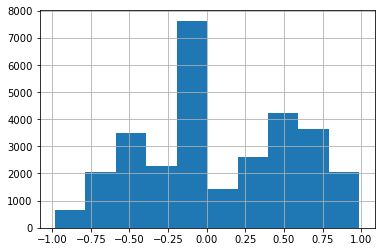

In [61]:
df_tweets['sentiment'].hist()

<AxesSubplot:>

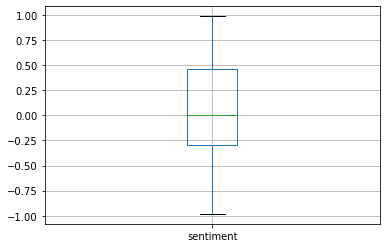

In [62]:
df_tweets.boxplot('sentiment')

## Extracting Concordance and Collocations

In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:

    How many times a word appears
    Where each occurrence appears
    What words surround each occurrence

In `nltk`, you can do this by calling `.concordance()`. To use it, you need an instance of the nltk.Text class, which can also be constructed with a word list.

In [63]:
text = nltk.Text(nltk.corpus.state_union.words())

text.concordance("america", lines=5)

Displaying 5 of 1079 matches:
 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom
 to make complete victory certain , America will never become a party to any pl
nly in law and in justice . Here in America , we have labored long and hard to 


Since `.concordance()` only prints information to the console, it’s not ideal for data manipulation. To obtain a usable list that will also give you information about the location of each occurrence, use `.concordance_list()`:

In [64]:
concordance_list = text.concordance_list("america", lines=2)
for entry in concordance_list:
     print(entry.line)

 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace


Another powerful feature of NLTK is its ability to quickly find collocations with simple function calls. **Collocations** are series of words that frequently appear together in a given text. In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

    Bigrams: Frequent two-word combinations
    Trigrams: Frequent three-word combinations
    Quadgrams: Frequent four-word combinations
    
The word “n-gram” actually describes infinitely many ways of tokenizing words - 2-grams, 3-grams, 4-grams etc. etc.
A 2-gram is a combination of two consecutive words. Probably the easiest way of understanding it is to see an example. In the sentence “here is some text”, there are three 2-grams: “here is”, “is some” and “some text”.

In [68]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(words_ns)

In [69]:
finder.ngram_fd.most_common(2)

[(('said', 'mock', 'turtle'), 20), (('said', 'march', 'hare'), 10)]

In [70]:
finder.ngram_fd.tabulate(2)

('said', 'mock', 'turtle')  ('said', 'march', 'hare') 
                        20                         10 


## Generating Wordclouds

We are going to use the [`wordcloud`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) package

In [ ]:
!pip install git+https://github.com/amueller/word_cloud

In [ ]:
!pip install Pillow

Now we can import the libraries and functions we will use

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS



For this example we will use again the *Alice in Wonderwall* novel

In [ ]:
text_alice

This library also contains StopWords as we saw last week

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("said") #Added specifically for this book

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 80, 
                      height = 40, 
                      max_words=200, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(text_alice)

In [ ]:
plot_cloud(wordcloud)

In [ ]:
# Save image
wordcloud.to_file("wordcloud.png")

In [ ]:
wc = WordCloud(background_color="white", max_words=200, stopwords=stopwords, contour_width=3, contour_color='steelblue', collocations=False)
wc.generate(text_alice)

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

We can create a personalised WordCloud by using any image

In [ ]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png

Lets transform each pixel into a `np.array` value

In [ ]:
alice_mask = np.array(Image.open('alice_mask.png'))
np.unique(alice_mask)

Here is the image we downloaded

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re
def getFrequencyDictForText(sentence):
    fullTermsDict = {}
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict[key] = tmpDict[key]
    return fullTermsDict

In [ ]:
getFrequencyDictForText(text_alice)

In [ ]:
text_dict = getFrequencyDictForText(text_alice)
text_dict
wc.generate_from_frequencies(text_dict)

In [ ]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
wc.generate_from_frequencies(text_dict)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

We can use any image for this actually

In [ ]:
!wget https://img.pokemondb.net/artwork/large/pikachu.jpg

In [ ]:
image = np.array(Image.open("pikachu.jpg"))
plt.imshow(image)

In [ ]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(image, default_color=(0,0,0))
wc = WordCloud(background_color="white", max_words=2000, mask=image,
               stopwords=stopwords)
wc.generate_from_frequencies(text_dict)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].imshow(wc, interpolation="bilinear")
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(image, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()